In [1]:
import pandas as pd
import numpy as np
import os

Start of loading and merge csv files

In [2]:
os.getcwd()

'C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system'

In [3]:
direct = os.chdir("C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system")

In [4]:
os.getcwd()

'C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system'

In [5]:
"""
for i in os.listdir("C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system"):
    print(i)
    df = 
    
"""

'\nfor i in os.listdir("C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system"):\n    print(i)\n    df = \n    \n'

In [6]:
##The fastest way to merge multiple CSV files with the same header together
##Source: https://stackoverflow.com/questions/44211461/what-is-the-fastest-way-to-combine-100-csv-files-with-headers-into-one

with open("restaurant_reviews1_1.csv", "wb") as fout: 
    with open("restaurant_reviews2.csv", "rb") as f:
        fout.write(f.read())
    for num in range(2, 7):
        with open("restaurant_reviews" + str(num) + ".csv", "rb") as f:
            next(f)
            fout.write(f.read())

In [7]:
df = pd.read_csv("C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system\\restaurant_reviews_merged.csv")

,Unnamed: 0,restaurant name,review
0,0,the-purple-pig-chicago,MY FAVORITE RESTAURANT IN CHICAGO!Reservations...
1,1,the-purple-pig-chicago,Was the highlight of my Chicago trip. I was ab...
2,2,the-purple-pig-chicago,"Plates are meant to be shared, which is great ..."
3,3,the-purple-pig-chicago,What more can I say that hasn't already been s...
4,4,the-purple-pig-chicago,Great food. Review of all the items we tried:S...
...,...,...,...
46999,572,mcdonalds-chicago-156,This particular location has improved in the l...
47000,573,papa-johns-pizza-chicago-23,Average pizza... just okay... not so good cust...
47001,574,papa-johns-pizza-chicago-23,Warning bells went off when I went to pick up ...
47002,575,papa-johns-pizza-chicago-23,I've ordered from the 87th location three time...


In [8]:
df = df.drop(columns = ["Unnamed: 0"], axis = 1)

For each restaurant, merge their reviews together THEN Compute cosine similiarity scores


In [60]:
df[df['restaurant name'] == 'the-purple-pig-chicago']['review']
emp_str = ""
for i in df[df['restaurant name'] == 'the-purple-pig-chicago']['review']:
    emp_str += i

In [9]:
##Create a dictionary

In [10]:
########Checking and removing Nan if needed

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [11]:
df = pd.read_csv("C:\\Users\\tchen\\Documents\\Data science\\Recommender_System_Project\\Context based recommender system\\restaurant_reviews1_1.csv")

In [12]:
#Combining reviews
a = df.groupby(['restaurant name'])['review'].apply(lambda x: ','.join(x)).reset_index()


In [38]:
#Python how to turn a list into a dataframe
df = pd.DataFrame(a)

,restaurant name,review,no stop words review
0,10q-chicken-chicago,This is the brand-new Hayden Hall location of ...,This brand-new Hayden Hall location 10Q Chicke...
1,1959-kitchen-and-bar-chicago,The food was surprisingly good for being withi...,The food surprisingly good within Second City....
2,2121-pantry-chicago,Great way to start the day off with a tasty br...,Great way start day tasty breakfast sandwich W...
3,3-arts-club-café-chicago-9,This place was really really posh. It's situat...,This place really really posh. It's situated r...
4,3-kings-jerk-chicago,The eggrolls at this place are delicious. The...,The eggrolls place delicious. They made order ...
...,...,...,...
1794,zeus-restaurant-chicago-2,Zeus is straight . Gotta hit them up at least ...,Zeus straight . Gotta hit least week gyro plat...
1795,zizis-cafe-chicago,One of the best places I have ever eaten in Ch...,One best places I ever eaten Chicago! From app...
1796,zoku-sushi-chicago-3,Local spot for amazing sushi plating with a de...,Local spot amazing sushi plating delicious sel...
1797,zombie-taco-chicago,*GLUTEN FREE/ ALLERGY REVIEW * We were informe...,*GLUTEN FREE/ ALLERGY REVIEW * We informed fry...


2635

#Examining missing data

In [15]:
import missingno as msno

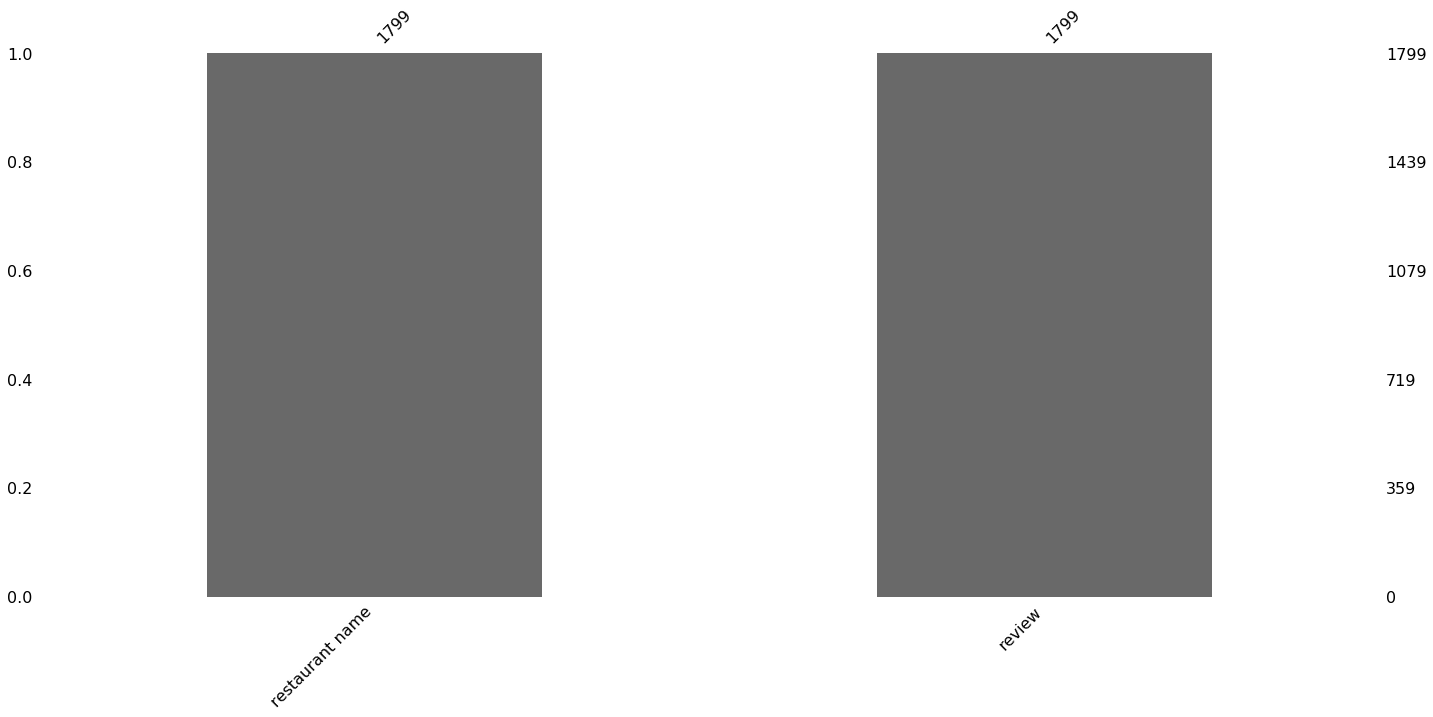

In [16]:
df['review'].isna().sum()

msno.bar(df)

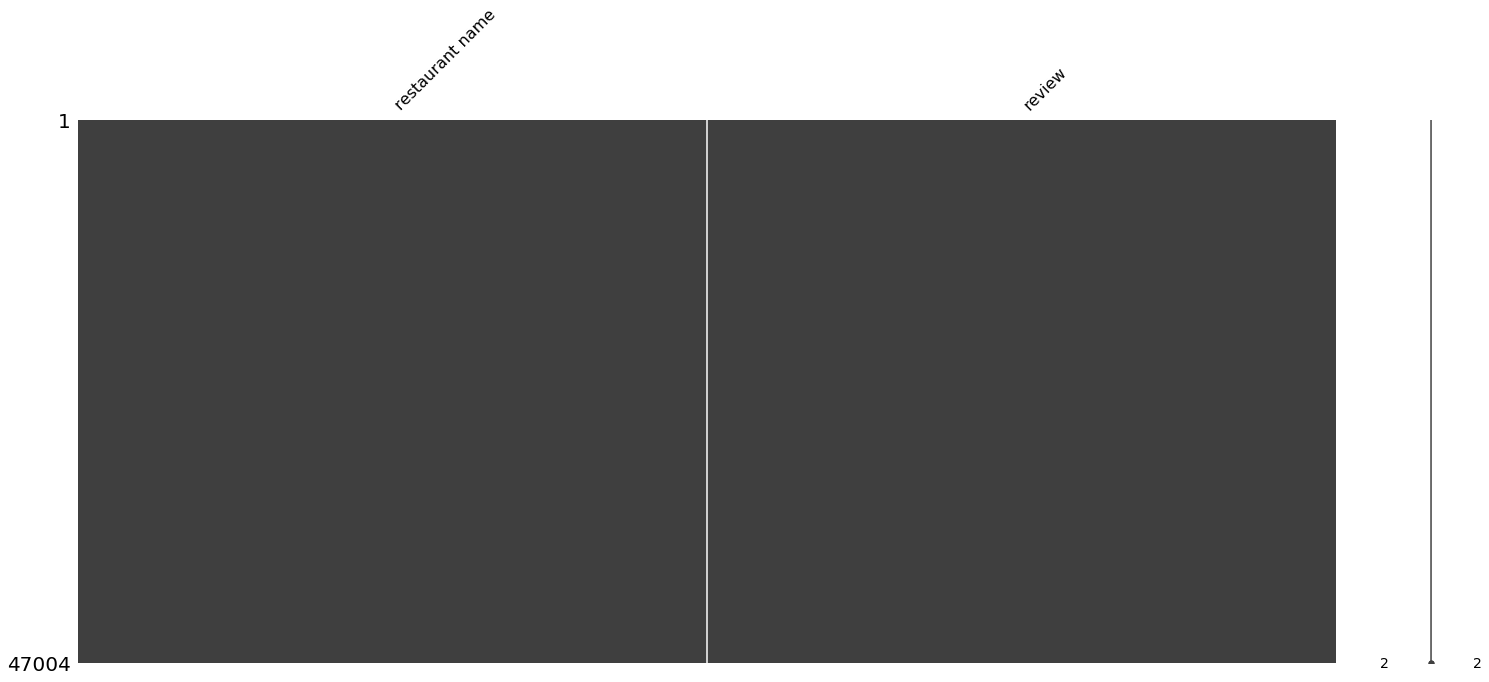

In [14]:
msno.matrix(df)

In [17]:
#####How to get rid of stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
#Stopwords variable
stop = stopwords.words('english')


In [41]:
#Exclude stopwrods with python list coomprehension and pandas.df.apply
df['no stop words review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [42]:
df

,restaurant name,review,no stop words review
0,10q-chicken-chicago,This is the brand-new Hayden Hall location of ...,This brand-new Hayden Hall location 10Q Chicke...
1,1959-kitchen-and-bar-chicago,The food was surprisingly good for being withi...,The food surprisingly good within Second City....
2,2121-pantry-chicago,Great way to start the day off with a tasty br...,Great way start day tasty breakfast sandwich W...
3,3-arts-club-café-chicago-9,This place was really really posh. It's situat...,This place really really posh. It's situated r...
4,3-kings-jerk-chicago,The eggrolls at this place are delicious. The...,The eggrolls place delicious. They made order ...
...,...,...,...
1794,zeus-restaurant-chicago-2,Zeus is straight . Gotta hit them up at least ...,Zeus straight . Gotta hit least week gyro plat...
1795,zizis-cafe-chicago,One of the best places I have ever eaten in Ch...,One best places I ever eaten Chicago! From app...
1796,zoku-sushi-chicago-3,Local spot for amazing sushi plating with a de...,Local spot amazing sushi plating delicious sel...
1797,zombie-taco-chicago,*GLUTEN FREE/ ALLERGY REVIEW * We were informe...,*GLUTEN FREE/ ALLERGY REVIEW * We informed fry...


In [43]:
df['no stop words review']

0       This brand-new Hayden Hall location 10Q Chicke...
1       The food surprisingly good within Second City....
2       Great way start day tasty breakfast sandwich W...
3       This place really really posh. It's situated r...
4       The eggrolls place delicious. They made order ...
                              ...                        
1794    Zeus straight . Gotta hit least week gyro plat...
1795    One best places I ever eaten Chicago! From app...
1796    Local spot amazing sushi plating delicious sel...
1797    *GLUTEN FREE/ ALLERGY REVIEW * We informed fry...
1798    I've ordered place twice every time food delic...
Name: no stop words review, Length: 1799, dtype: object

In [44]:
df.shape

(1799, 3)

In [20]:
########Calculating TF-IDF

In [26]:
#Getting TF value
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF vecotrizer object - removes all stop words
tfidf = TfidfVectorizer(stop_words = 'english')

#Construct the tfidf matrix by fitting and transforming the data to count/calculate the TF score AND IDF score
tfidf_matrix = tfidf.fit_transform(df['review']) ##Calcualtes the Tfidf values for us

print(tfidf_matrix.shape)
##From the terms, you have the vocabulary list of all unique words for all restaurants
##Types of similarity matrixes = manhattan euclidean, Pearson, cosine similairty score


(1799, 36884)


In [57]:
###########Final cleaned dataframe
df = df.drop(columns = ['review'], axis = 1)


KeyError: "['review'] not found in axis"

In [58]:
df.to_csv("context_recommender_final1.csv")

,restaurant name,no stop words review
0,10q-chicken-chicago,This brand-new Hayden Hall location 10Q Chicke...
1,1959-kitchen-and-bar-chicago,The food surprisingly good within Second City....
2,2121-pantry-chicago,Great way start day tasty breakfast sandwich W...
3,3-arts-club-café-chicago-9,This place really really posh. It's situated r...
4,3-kings-jerk-chicago,The eggrolls place delicious. They made order ...
...,...,...
1794,zeus-restaurant-chicago-2,Zeus straight . Gotta hit least week gyro plat...
1795,zizis-cafe-chicago,One best places I ever eaten Chicago! From app...
1796,zoku-sushi-chicago-3,Local spot amazing sushi plating delicious sel...
1797,zombie-taco-chicago,*GLUTEN FREE/ ALLERGY REVIEW * We informed fry...


In [50]:
#Calculating Cosine similarity score through inear_kernal instead of cosine_similarities() function since it is faster

from sklearn.metrics.pairwise import linear_kernel

#Compute cosine similarity using linear_kernal (which multiples x^Ty)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) ####ERROR: Memory error, how to fix?

print(cosine_sim.shape)

(1799, 1799)


In [51]:
cosine_sim[0] #This gives us the vlaues of this restaurant compared against all others

array([1.        , 0.06427549, 0.03142232, ..., 0.05739628, 0.07021599,
       0.07351227])

In [52]:
##Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index = df['restaurant name']).drop_duplicates()

In [53]:
##Construct that will take in the restaurant name and output the most ismilar movies;:

def get_recommendations(name, cosine_sim = cosine_sim):
    #Get the index of the movei that matches the title
    idx = indices[name]
    
    #Get the pairwise similarity score of all movie with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the moveis based on the simialrity cores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #get the movie indices 
    restaurant_indices = [i[0] for i in sim_scores]
    
    #Return the top 10 most similar movies
    return df['restaurant name'].iloc[restaurant_indices]

In [54]:
get_recommendations('wildberry-pancakes-and-cafe-chicago-4')

1754               wildberry-pancakes-and-cafe-chicago-2
444                                    eggs-cafe-chicago
679              honey-berry-pancakes-and-cafe-chicago-5
1785                             yolk-south-loop-chicago
1134                      original-pancake-house-chicago
356     cozy-corner-restaurant-and-pancake-house-chicago
487                            eppels-restaurant-chicago
1103                          nookies-old-town-chicago-2
1786                        yolk-streeterville-chicago-2
1450                              stray-hen-cafe-chicago
Name: restaurant name, dtype: object

In [ ]:
###Next steps, try different similarity scores - ie manhattan euclidean, Pearson

In [33]:
df['restaurant name'].unique()

array(['10q-chicken-chicago', '1959-kitchen-and-bar-chicago',
       '2121-pantry-chicago', ..., 'zoku-sushi-chicago-3',
       'zombie-taco-chicago', 'zoup-chicago'], dtype=object)

0                10q-chicken-chicago
1       1959-kitchen-and-bar-chicago
2                2121-pantry-chicago
3         3-arts-club-café-chicago-9
4               3-kings-jerk-chicago
                    ...             
1794       zeus-restaurant-chicago-2
1795              zizis-cafe-chicago
1796            zoku-sushi-chicago-3
1797             zombie-taco-chicago
1798                    zoup-chicago
Name: restaurant name, Length: 1799, dtype: object

In [ ]:
df[]